阻尼牛顿法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)


def f(x1, x2):
    return 3*x1**2 + +3*x2**2 - (x1**2)*x2


iter = 0
x0 = np.array([0, 0])
eps = 0.000001


def descent(x):
    return np.array([6*x[0]-2*x[0]*x[1], 6*x[1]-x[0]**2])


def hessian(x):
    return np.array([[6-2*x[1], -2*x[0]], [-2*x[0], 6]])

In [3]:
x0 = np.array([1.5, 1.5])
x = x0
path1 = []

damping_factor = 1

while iter < 100:
    g = descent(x)
    h = hessian(x)
    print(iter, x, np.linalg.norm(g, ord=np.inf))
    path1.append(x)
    if np.linalg.norm(g, ord=np.inf) < eps:
        break
    d = -np.dot(np.linalg.inv(h + damping_factor * np.eye(2)), g)
    a = 1
    #  Armijo 条件
    while f(x[0] + a*d[0], x[1] + a*d[1]) >= f(x[0], x[1]) + 0.5*a*np.dot(g, d):
        a /= 2
    x = x + a*d
    iter += 1

print(a)

0 [1.5 1.5] 6.75
1 [0.13815789 0.43421053] 2.5861755540166214
2 [0.00564727 0.05952619] 0.35712526803528166
3 [0.00073696 0.00850038] 0.05100170705659615
4 [0.000104   0.00121428] 0.0072856907895021954
5 [1.48310657e-05 1.73467981e-04] 0.0010408076686765262
6 [2.11819860e-06 2.47811178e-05] 0.0001486867020640477
7 [3.02589087e-07 3.54015922e-06] 2.1240955240089347e-05
8 [4.32267938e-08 5.05737022e-07] 3.034422132309735e-06
9 [6.17525180e-09 7.22481459e-08] 4.334888751290365e-07
1


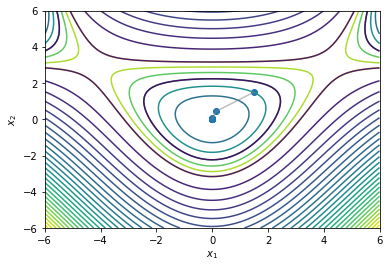

In [4]:
plt.contour(X1, X2, f(X1, X2), levels=[-10, -5, 0, 5, 10, 15, 20, 25, 30])

plt.contour(X1, X2, f(X1, X2), levels=30)

plt.scatter(*zip(*path1), marker='o')
plt.plot(*zip(*path1), linestyle='-', color='gray', alpha=0.5)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()